![title](images/classroom/bb_blank2.png)

## Case Study

- Explore and perform analysis on a real dataset using Python
- Goal: get good understanding of using Python for data management, exploration, and analysis

## What is Ethereum?
<img src="images/Cut_outs/Cut_out_18.png" width=100 height=100 />

Ethereum is a technology that lets you send cryptocurrency to anyone for a small fee. It also powers applications that everyone can use and no one can take down. It's the world's programmable blockchain and a marketplace of financial services, games and apps that can't steal your data or censor you. 

Ethereum also has its own cryptocurrency, namely 'ETHER' or 'ETH' for short. Check out more about Ethereum and ETH on https://ethereum.org/. 

## Validator Dataset

This dataset is obtained from the Beacon Scan block explorer, where it captured and characterized a validator's "journey" as a validator joins the Ethereum 2.0 Medalla testnet. 


### More on this "journey"

To participate as a validator, Ethereum 1.0 holders will transfer 32 ETH into a deposit contract that creates an equivalent 32 bETH credit on Ethereum 2.0’s Beacon Chain. This places the validator into an activation queue. Before blockchain activation there is an eligibility period where the queued validator must wait until the first epoch it is eligible to be activated. At any point after the eligibility epoch has passed, the validator may complete the setup of the beacon chain client and join the network. Once online, the validator’s activation epoch is logged and it may begin being assigned to propose blocks or participate in block attestations. For the validators who can no longer commit to their responsibilities, after a set duration of time, it is possible to exit the network. Beacon clients that exit have a time stamp logged of the epoch their client was disabled and when their funds are withdrawn. 

## Explore the data in Python

Let's load the data and look at the first few rows. We will use the <b> pandas </b> and <b> mathplotlib </b> libraries. Also, we can use the <b> head() </b> function to show the first five rows. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
valid_raw = pd.read_csv("validator_data.csv",encoding = "ISO-8859-1") 
#Note that we need the encoding parameter here as the csv file has some special character: '|'

In [3]:
valid_raw.head()

Unnamed: 0             publickey  index currentBalance effectiveBalance  \
0           1  0x8e968b....77adc40b  55738  288.16978 ETH           32 ETH   
1           2  0xb228bd....f9be419b  53633  191.76237 ETH           32 ETH   
2           3  0xaf7cc1....18ee94ff  44766  191.66998 ETH           32 ETH   
3           4  0x91845a....048a358b  25550   190.1818 ETH           32 ETH   
4           5  0x81ccb4....e5130868  34231  160.39103 ETH           32 ETH   

       proposed eligibilityEpoch activationEpoch exitEpoch withEpoch  slashed  
0   3  |3  |  0             6265            9144        --        --    False  
1   2  |0  |  2             5051            8618        --        --    False  
2   4  |0  |  4             4155            6401        --        --    False  
3  10  |3  |  7              311            1404        --        --    False  
4   9  |7  |  2             3312            3768        --        --    False

We can use <b> dtypes </b> to see the data types of each column and <b> shape </b> to see the size of the data. 

In [4]:
valid_raw.dtypes

Unnamed: 0           int64
publickey           object
index                int64
currentBalance      object
effectiveBalance    object
proposed            object
eligibilityEpoch    object
activationEpoch     object
exitEpoch           object
withEpoch           object
slashed               bool
dtype: object

In [5]:
valid_raw.shape

(80392, 11)

We can see that we have 80392 rows and 11 columns. 

## The variables 

The 11 variables are:

* `Unnamed: 0` - The row index of the validator.
* `publickey` - The public key identifying the validator.
* `index` - The index number of the validator.
* `currentBalance` - The current balance, in ETH, of the validator.
* `effectiveBalance` - The effective balance, in ETH, of the validator.
* `proposed` - The number of blocks assigned, executed, and skipped by the validator.
* `eligibilityEpoch` - The epoch number that the validator became eligible.
* `activationEpoch` - The epoch number that the validator activated.
* `exitEpoch` - The epoch number that the validator exited.
* `withEpoch` - Epoch when the validator is eligible to withdraw their funds.  This field is not applicable if the validator has not exited.
* `slashed` - Whether the given validator has been slashed.

## Data manipulation

To be suitable for analysis, this data required some minor data manipulation of its fields. Here is what we do:

1. Separate 'proposed' to three separate columns 'assigned', 'executed', and 'skipped' using <b> str.split() </b>
2. Concantenate these columns to the dataframe using <b> pd.concat() </b>
3. Rename those columns using <b> rename() </b> and the parameter <b> inplace = True </b> to update the dataframe
4. Drop the columns 'proposed', 'eligibilityEpoch' and 'withEpoch' using <b> drop() </b>
5. Replace 'genesis' and '--' with 0 using <b> replace() </b>
6. Parse the 'currentBalance' and 'effectiveBalance' using <b> str.split() </b>  and <b> astype() </b>so that they become numeric variables.
7. Convert 'assigned', 'executed', 'skipped', 'eligibilityEpoch', 'activationEpoch', 'exitEpoch' and 'withEpoch' to numeric as well.


In [6]:
#1
proposed = valid_raw['proposed'].str.split("|",n =2, expand=True) 
#2
valid = pd.concat([valid_raw, proposed], axis=1) 
#3
valid.rename(columns={'Unnamed: 0': 'rowindex', 0:'assigned', 1:'executed', 2:'skipped'}, inplace=True) 
#4
valid = valid.drop(columns=['proposed','eligibilityEpoch','withEpoch']) 
#5
valid = valid.replace(['genesis'],0)
valid = valid.replace(['--'],0)
#6
valid['currentBalance'] = valid['currentBalance'].str.split(" ").str[0].astype(float)
valid['effectiveBalance'] = valid['effectiveBalance'].str.split(" ").str[0].astype(int)
#7
valid.iloc[:,[5,6,8,9,10]] = valid.iloc[:,[5,6,8,9,10]] .astype(int)

Let's take a look at the data after all the manipulation we did. <b> sample(n) </b> is a great way to see n random rows of the data. 

In [7]:
valid.sample(5)

rowindex             publickey  index  currentBalance  \
25786     28587  0xa8a0ae....16715b4d  64691        32.11676   
17984     19885  0xaa2e4b....a03bbb84  51849        32.23905   
28319     31420  0x9275a6....73fc2eaa  67243        32.09720   
53753     59654  0xa8d03f....a4bd649a   7760        31.75311   
29378     32579  0x8d009b....63f862bd  68994        32.08449   

       effectiveBalance  activationEpoch  exitEpoch  slashed  assigned  \
25786                32            11382          0    False         1   
17984                32             8172          0    False         1   
28319                32            12020          0    False         1   
53753                31                0          0    False         8   
29378                32            12458          0    False         1   

       executed  skipped  
25786         1        0  
17984         1        0  
28319         1        0  
53753         8        0  
29378         1        0

We can use <b> describe() </b> to create a simple summary statistics table. 

In [8]:
valid.describe()

rowindex         index  currentBalance  effectiveBalance  \
count  80392.000000  80392.000000    80392.000000      80392.000000   
mean   44601.247624  40196.272676       31.790736         30.761941   
std    25785.215202  23207.619992        6.220533          3.069054   
min        1.000000      0.000000        1.000000          1.000000   
25%    22298.750000  20098.750000       31.591745         31.000000   
50%    44596.500000  40196.500000       32.015890         32.000000   
75%    66894.250000  60294.250000       32.190765         32.000000   
max    89292.000000  80392.000000      288.169780         32.000000   

       activationEpoch     exitEpoch      assigned      executed       skipped  
count     80392.000000  80392.000000  80392.000000  80392.000000  80392.000000  
mean       5804.539283    338.277863      6.090643      4.424557      1.666086  
std        5089.126903   1354.971748      4.839518      4.098786      2.917917  
min           0.000000      0.000000      0.000000      0.000000      0.000000  
25%          41.000000      0.000000      2.000000      1.000000      0.000000  
50%        5259.000000      0.000000      5.000000      3.000000      0.000000  
75%       10283.000000      0.000000     10.000000      7.000000      2.000000  
max       15450.000000  15288.000000     31.000000     25.000000     31.000000

In [9]:
valid.dtypes

rowindex              int64
publickey            object
index                 int64
currentBalance      float64
effectiveBalance      int32
activationEpoch       int32
exitEpoch             int32
slashed                bool
assigned              int32
executed              int32
skipped               int32
dtype: object

After the manipulation, the data has 12 columns (1 character, 1 logical, 10 numeric)

## Activation

Activation is the first step towards compliance for any node attempting to join the active validator set. Let's find out how many validators are activated over time. We can simply count the number of each 'activationEpoch' group using <b> groupby() </b> and <b> count() </b>. 

In [10]:
num_activated = valid.groupby('activationEpoch')['activationEpoch'].count().reset_index(name="count")
# Note that reset_index() is used to make 'activationEpoch' a column and for renaming purposes 
num_activated

activationEpoch  count
0                    0  20083
1                   38      4
2                   39      4
3                   40      4
4                   41      4
...                ...    ...
15073            15446      5
15074            15447      3
15075            15448      5
15076            15449      3
15077            15450      5

[15078 rows x 2 columns]

We can plot a simple line plot using <b> plot() </b> to see how the number changes over time. We will exclude activationEpoch 0 for the purpose of getting a better graph. 

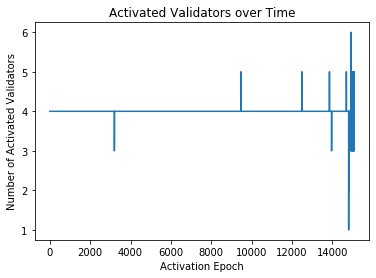

In [11]:
num_activated[1:]['count'].plot()
plt.title('Activated Validators over Time')
plt.xlabel('Activation Epoch')
plt.ylabel('Number of Activated Validators')
plt.show()

From the graph, we see that 4 is a very common number of activated validators over time. 

Let's take a look at the time series of its cumulative number over time by using the <b> cumsum() </b> and the <b> plot()</b> functions. 


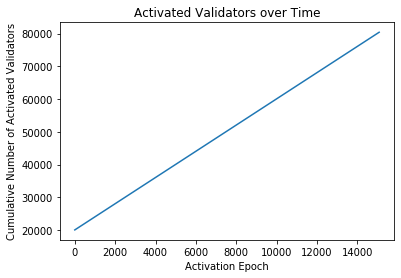

In [12]:
num_activated['count'].cumsum().plot()
plt.title('Activated Validators over Time')
plt.xlabel('Activation Epoch')
plt.ylabel('Cumulative Number of Activated Validators')
plt.show()

A close inspection of the graph reveals two visible anomalies; one between Epoch 3238 and 3440, and the other, between 14189 and 14311. In both instances no new validators were activated on the blockchain for over 150 epochs which suggests there was some fault in the network’s activation functionality. 

## Exit

For validators attempting to leave the network, there is a mandatory lock-in period that is enforced. It is only after this time frame is a staker are allowed to withdraw their funds and leave the network. This process is a two step procedure where the node client software is first shut down and the bETH is withdrawn from the network. Let's find the distribution of the time from activation to exit. First, we create a temporary variable: 'timetoExit' using the formula:

$$ \frac{6.4}{60} * (\text{exitEpoch} - \text{activationEpoch}) $$
, where the $6.4$ is the conversion from Epoch to minute and $60$ is the conversion from minute to hour. Then, we can plot a histogram using <b> plot.hist() </b>. 


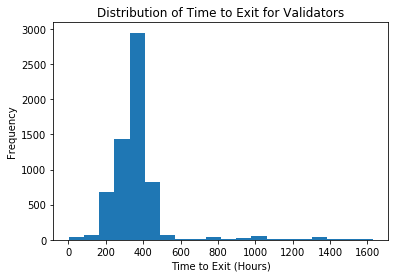

In [13]:
nonzero_exitEpoch = valid[valid['exitEpoch']!=0]
nonzero_exitEpoch['timeToExit'] = (nonzero_exitEpoch['exitEpoch']-nonzero_exitEpoch['activationEpoch'])*6.4/60
nonzero_exitEpoch['timeToExit'].plot.hist(bins=20)

plt.title('Distribution of Time to Exit for Validators')
plt.xlabel('Time to Exit (Hours)')
plt.show()

The histogram looks great! We can dive in to the table to see exactly how many validators exited as well as other summary statistics. 

In [14]:
nonzero_exitEpoch.describe()['timeToExit']

count    6304.000000
mean      362.719239
std       168.660534
min         0.960000
25%       269.866667
50%       359.946667
75%       394.773333
max      1630.720000
Name: timeToExit, dtype: float64

We see that a total of 6304 validators have exited with an average of 363 hours or around 15.1 days. Also, the fastest exit time is actually less than 1 hour.

## Your turn

<img src="images/Cut_outs/Cut_out_02.png" width=100 height=100 />

We can better observe these trends over time with both a traditional time series plot and a cumulative count graph that tracks the number of validators exiting throughout the epochs. 

1. Get the data (i.e. count the exitEpoch and also obtain the cumulative sum) and display 3 random rows of the data.
2. Get the summary of the count. 
3. Plot a time series of the count and color the line blue.
4. Plot a time series of the cumulative sum.

## Answers:

## 1

In [15]:
count = nonzero_exitEpoch.groupby('exitEpoch')['exitEpoch'].count().reset_index(name="count")
cumsum = nonzero_exitEpoch.groupby('exitEpoch')['exitEpoch'].count().cumsum().reset_index(name="cumulative")
exitEpoch_table = pd.concat([count,cumsum.iloc[:,1]], axis=1)
exitEpoch_table

exitEpoch  count  cumulative
0             9      1           1
1            26      1           2
2            44      1           3
3           482      1           4
4           535      1           5
...         ...    ...         ...
1712      15035      2        6296
1713      15073      1        6297
1714      15092      4        6301
1715      15093      2        6303
1716      15288      1        6304

[1717 rows x 3 columns]

## 2

In [16]:
exitEpoch_table.describe()['count']

count    1717.000000
mean        3.671520
std         0.869965
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: count, dtype: float64

## 3

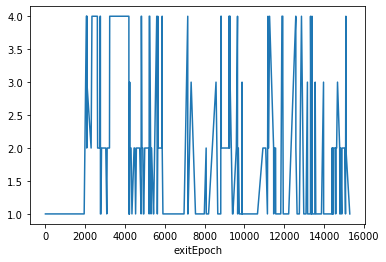

In [17]:
nonzero_exitEpoch.groupby('exitEpoch')['exitEpoch'].count().plot()

## 4

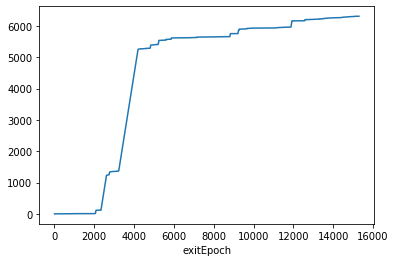

In [18]:
 nonzero_exitEpoch.groupby('exitEpoch')['exitEpoch'].count().cumsum().plot()

## Investigation into the Block Proposal Process

To start, we will look at the distribution of the numbers of blocks 'assigned', 'executed' and 'skipped.' One way to do it is simply create a plot for each column, which we already know how to do. For instance, we can do the following:


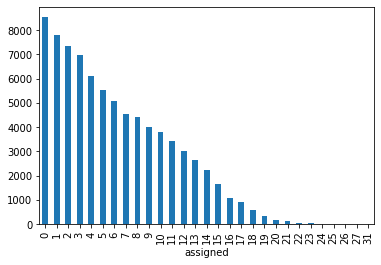

In [19]:
valid.groupby('assigned')['assigned'].count().plot.bar()

Let's do a different way and plot all three variables using <b> apply() </b> and the parameter <b> subplots = True </b> 

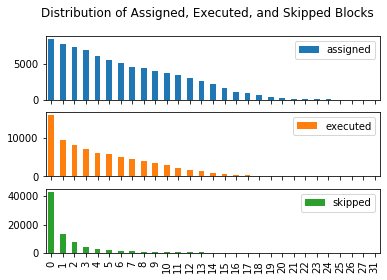

In [20]:
valid[['assigned','executed', 'skipped']].apply(pd.Series.value_counts).plot.bar(subplots=True,title=['','',''])
#Note that title =['','',''] is simply to remove all three of the subtitles
plt.suptitle('Distribution of Assigned, Executed, and Skipped Blocks')
plt.show()

From the barcharts, we observe that each validator status is distributed exponentially where most nodes have not had any assignments, executed blocks or skipped assignments. Globally however, the average validator has been assigned to 6 slots, has successfully proposed 4 blocks and has missed 2 slot assignments. 

A quick exercise for you: How would you get the averages mentioned in one shot? Take a few minutes to try it out! 

Here is one way:

In [21]:
valid[['assigned','executed', 'skipped']].mean()

assigned    6.090643
executed    4.424557
skipped     1.666086
dtype: float64

## Your turn

<img src="images/Cut_outs/Cut_out_05.png" width=100 height=100 />

By treating the executions and assignments skipped as proportions, we can visualize the distributions of both execution success and skipped slot as rates. To do so we define each variable by taking the number of executed or skipped blocks, and dividing them by the total number of assigned blocks.

* Create two histogram plots that show the distribution of 'Execution Rate' and 'Skipped Rate'. Give clear titles and different colors for these two plots. 

## Answers:

## First Plot

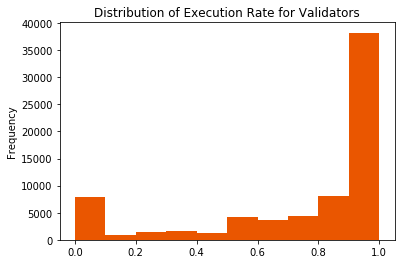

In [22]:
valid['Execution Rate'] = valid['executed']/valid['assigned']
valid['Execution Rate'].plot.hist(color='#EA5600')
plt.title('Distribution of Execution Rate for Validators')
plt.show()

## Second Plot

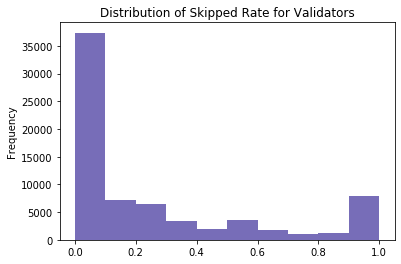

In [23]:
valid['Skipped Rate'] = valid['skipped']/valid['assigned']
valid['Skipped Rate'].plot.hist(color='#776DB8')
plt.title('Distribution of Skipped Rate for Validators')
plt.show()

Surprisingly, the rate of successful block executions and the proportion of skipped slots appear to follow reflected Beta distributions where most of the probability mass rests at the edges of the support range. Most nodes have had only success executing on their block proposals; however a significant portion of the validators have not had any success. Likewise, most validators have not skipped any slot assignments, but a substantial portion of them have skipped all of their block proposals. This result suggests that there will likely be a clear demarcation between the behaviors of certain validators on the network.


## Slashing

Slashing on the Ethereum 2.0 network is the act of punishing validators for violations of the consensus rules by either improperly proposing a block or failing to properly attest to a block while in an assigned committee. To better understand the slashing behavior within our dataset, we will investigate the number of slashed validators over exitEpoch. To do so, we simply filter the data based on 'slashed' being TRUE and group_by exitEpoch. Then, we use the <b> cumsum() </b> function just like before. 

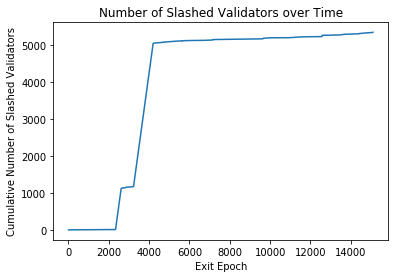

In [24]:
slashed = valid[valid['slashed']== True]
slashed.groupby('exitEpoch')['slashed'].count().cumsum().plot()
plt.title('Number of Slashed Validators over Time')
plt.xlabel('Exit Epoch')
plt.ylabel('Cumulative Number of Slashed Validators')
plt.show()

From the graph, we notice that between epochs 2000 and 4000, the slashed validators rose from 0 to 5000. Since epoch 4000, the growth has been much slower, barely creeping up towards 5500 through epoch 15000. The spike in slashings during epochs 2000 and 4000 correspond directly with the large exodus of validators that we observed previously. When punished with a slashing, a portion of the validators stake is removed. If the effective balance of the validator drops too low, it could be subject to removal from the network.


From our macro analysis, we’ve shown that analytical techniques applied to Medalla’s testnet data can help us develop a foundational understanding of the network. Our tracking of validator activations, execution rates, and exit patterns, among other metrics, cast the first form an picture of network health as a whole that we can then recast and project onto individual validators. Our next section will further develop this idea as we focus specifically on understanding the actions of Ethereum 2.0’s stakers.


## Behavioral based Validator Rankings

It is our goal at this junction to develop a categorization method that can codify patterns in validator behavior, characterize it and discern the difference between constructive and destructive network actions. To facilitate the discovery of these behavioral patterns and fulfill the aforementioned objectives, we will employ a weighted linear rank scoring algorithm. This is a simple, yet powerful sorting technique that maps a validator’s characteristics on to a single ranked score that can be compared.

As inputs into the scoring function we’ll use the current balance, number of successful executions, the active status of the validator, how long the node has been active, the number of skipped assignments and a binary indicator for whether the node has been slashed. 

OUt of the 6 variables, 'currentBalance', 'executed', 'skipped', and 'slashed' are readily available in the dataset. We can use 'exitEpoch' to get the active status of the validator, and lastly, how long the node has been active is the same as the 'timetoExit' variable we computed in previous slide, where we use this formula: $$\frac{6.4}{60}*(\text{exitEpoch} - \text{activationEpoch}).$$ 


The polarities of each of these variables are unambiguous. Of the six, the only variables that indicate negative behavior are the number of skipped slots and whether the validator has been slashed. To account for this we set negative weightings on those two variables, while allowing the others maintain their positive polarity.

Here is what we need to do in order to get all the variables ready in one place:

1. Create variable 'active' that indicates the active status
2. Modify 'exitEpoch' so that it shows 15579 instead of 0. Note that 15579 is the latest epoch when the data was obtained. We can do this using <b> replace() </b>
3. Using this new 'exitEpoch', we create variable 'active_time'
4. Rename 'executed' to 'executions'
5. Flip the 'slashed' indicator to have negative weighting
6. Create variable 'skips' as the negative version of 'skipped'
7. Select some of the relevant columns

Note that the last two steps are done to account for negative behavior as mentioned. 

<img src="images/Cut_outs/Cut_out_19.png" width=100 height=100 />

In [25]:
valid_stats = valid
#1
valid_stats['active'] = valid_stats['exitEpoch']==0
#2
valid_stats['exitEpoch'] = valid_stats['exitEpoch'].replace([0],15579)
#3
valid_stats['active_time'] = (valid_stats['exitEpoch']-valid_stats['activationEpoch'])*6.4/60
#4
valid_stats.rename(columns={'executed':'executions'}, inplace=True)
#5
valid_stats['slashed'] = ~valid_stats['slashed']
#6
valid_stats['skips'] = -1*valid_stats['skipped']

valid_stats = valid_stats[['publickey','index','currentBalance','executions','skips','slashed','active','active_time']]

## Weighted Linear Rank Scoring Algorithm

Now that we have all the variables we need, we can now try to implement the algorithm. The following explains briefly on what we need to do.

Let $x_1 =$ currentBalance, $x_2 =$ executions, $x_3 =$ skips, $x_4 =$ slashed,  $x_5 =$ active, and  $x_6 =$ active_time. For any specific validator, the ordered rankings of its respective values can be represented as $r_i$. We use weights, $w_i$, to correspond to emphasis placed on variable $x_i$ in the scoring function $S$. The weight vector satisfies the following constraint: $w_1+w_2+w_3+...+w_6 = 1$.  The score, S, is then computed as the scalar product of the ranks and weights.

$$S =\sum_{i=1}^6 w_ir_i $$

Now that we have a general idea, let's code!

1. Get the ranks of each of the 6 variables we discussed using <b> rank() </b>
2. Create variable 'Score' that give the sum of the rank group by 'publickey' using <b> sum(axis=1) </b> 
3. Create variable 'Rank' with the rank of the Score (higher the score translate to lower rank) using <b> rank() </b>

Also, note that we divided 'active_time' by 4 to reduce the weighting as we do not want to punish new validators too much.

In [26]:
#1 Combine those ranks with 'publickey' and 'index' columns
valid_rank = pd.concat([valid[['publickey','index']], 
                        valid_stats[['currentBalance','executions','skips','slashed','active','active_time']].rank()],
                       axis=1)
# Lower the weight of 'active_time' 
valid_rank['active_time']=valid_rank['active_time']/4
#2
valid_rank['Score'] = valid_rank.iloc[:, 2:].sum(axis=1)
#3
valid_rank['Rank'] = (-valid_rank['Score']).rank()

Now that we have their 'Score' and 'Rank', we will put add the them back to the 'valid_stats' dataframe. To do so, we simply use <b> merge() </b>. Also, we revert 'slashed' and 'skips' to its original value before the negative weighting. 

In [27]:
valid_all = pd.merge(valid_stats,valid_rank[['index','Score','Rank']],left_on='index', right_on='index')
valid_all['slashed'] = ~valid_all['slashed']
valid_all['skips'] = -1*valid_all['skips']

In [28]:
#Sort by 'Rank'
valid_all = valid_all.sort_values('Rank')

In [29]:
valid_all

publickey  index  currentBalance  executions  skips  \
996    0x85bbe9....c2498c8b  17011        63.70175          17      0   
1261   0x87e4bd....7013d371   5270        63.13998          18      0   
1705   0x933758....1b235da8   9736        32.92532          22      0   
1030   0xa81824....5f5bf334   5065        63.57879          16      0   
1752   0xb181fc....8ccf53ec   5343        32.76045          19      0   
...                     ...    ...             ...         ...    ...   
79100  0x923947....5a69e0bf  29001        19.57717           0      5   
79168  0x8c3827....74597690  29038        19.57088           0      5   
79189  0x83684d....8695d01d  29078        19.56756           0      5   
78894  0x901c78....e7e22a04  25938        19.61209           0      6   
80374  0x903d9b....e27b6ffa  18297        18.40684           0      5   

       slashed  active  active_time       Score     Rank  
996      False    True  1661.760000  322724.375      1.0  
1261     False    True  1661.760000  322661.875      2.0  
1705     False    True  1661.760000  322422.875      3.0  
1030     False    True  1661.760000  322356.875      4.0  
1752     False    True  1661.760000  322278.375      5.0  
...        ...     ...          ...         ...      ...  
79100     True   False   196.480000   25456.250  80388.0  
79168     True   False   195.840000   25375.000  80389.0  
79189     True   False   195.413333   25347.000  80390.0  
78894     True   False   276.160000   25080.875  80391.0  
80374     True   False   260.480000   25027.875  80392.0  

[80392 rows x 10 columns]

To better highlight the rate of change of the 'Score', we can plot it against the 'Rank'. We will simply use <b> scatter()</b> and use the 'Score' as as the color parameter. 

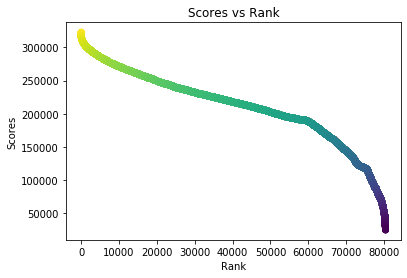

In [30]:
plt.scatter(x=valid_all['Rank'],y=valid_all['Score'], c =valid_all['Score'])
plt.title('Scores vs Rank')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.show()

While the validator score curve does show there is differentiation between the scores, it fails to give any indication of clear heterogeneity within the node’s behaviors. Let's plot the distribution of the 'Score'. 


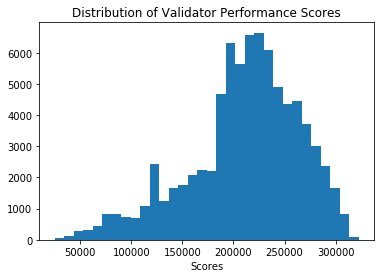

In [31]:
plt.hist(data=valid_all, x= 'Score', bins=32)
plt.title('Distribution of Validator Performance Scores')
plt.xlabel('Scores')
plt.show()

The histogram of the score values is multimodal, which is the first encouraging sign that our scoring function has successfully captured and encoded a significant portion of the variance in validator behavior.

## Segmentation Study of Validator Behavior

As with many unsupervised tasks, the transition from scores to a finite segmentation is often tricky, particularly when there is no well established subject matter context for the selection of cut-offs, nor one agreed upon cluster validation method in the literature to appeal to. With a mixture of investigation, intuition and mathematical hand waving, we settled on the selection of seven score tiers to differentiate network behavior as follows. 

$$\begin{align}
\text{Rank} & & \text{Tier} \\
[1,2489] & \ \ \ \ \ \ \ \ \ \longrightarrow & 1 \\
(2489,6942] & \ \ \ \ \ \ \ \ \ \longrightarrow & 2 \\
(6942,38396] & \ \ \ \ \ \ \ \ \ \longrightarrow & 3 \\
(38396,56534] & \ \ \ \ \ \ \ \ \ \longrightarrow & 4 \\
(56534,67877] & \ \ \ \ \ \ \ \ \ \longrightarrow & 5 \\
(67877,75644] & \ \ \ \ \ \ \ \ \ \longrightarrow & 6 \\
(75644,\infty) & \ \ \ \ \ \ \ \ \ \longrightarrow & 7 \end{align}$$

We can easily do this using <b> np.select() </b>.

In [32]:
conditions = [
    (valid_all['Rank'] <= 2489),
    (valid_all['Rank'] > 2489) & (valid_all['Rank'] <= 6942),
    (valid_all['Rank'] > 6942) & (valid_all['Rank'] <= 38396),
    (valid_all['Rank'] > 38396) & (valid_all['Rank'] <= 56534),
    (valid_all['Rank'] > 56534) & (valid_all['Rank'] <= 67877),
    (valid_all['Rank'] > 67877) & (valid_all['Rank'] <= 75644),
    (valid_all['Rank'] > 75644)
    ]

values = [1,2,3,4,5,6,7]

In [33]:
import numpy as np
valid_all['Tier'] = np.select(conditions, values)

Let's recreate the Sorted Validator Scores plot. However, this time make sure that the color will show different tiers. Note that we used <b> invert_xaxis() </b> to reverse the order so we have it goes from lower tier to higher tier. 

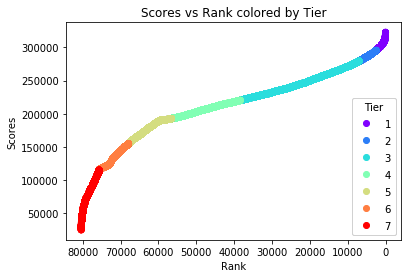

In [34]:
fig, ax = plt.subplots()

scatter = ax.scatter(x="Rank", y="Score",data=valid_all, c="Tier", cmap = 'rainbow', label="Tier")

legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Tier")
plt.title('Scores vs Rank colored by Tier')
plt.xlabel('Rank')
plt.ylabel('Scores')
ax.add_artist(legend)
ax.invert_xaxis()
plt.show()

With these cut-off ranges, we can apply them to our histogram of scores to create a stacked distribution and then reapply those same rules to partition the histogram along its tiers. Here, we can use <b> plotly.express </b>. Using their <color_discrete_map </b> parameter, we can defind the colors for each Tier. 

In [35]:
import plotly.express as px
px.histogram(valid_all, x="Score",
                   color = 'Tier',
                    color_discrete_map = {1:'purple',2:'blue',3:'lightblue',4:'green', 5:'yellow', 6:'orange', 7:'red'}, 
                   nbins=32
                  )


We can also separate the histograms by Tier using <b> facet_col </b>.


In [36]:
px.histogram(valid_all, x="Score",
                   color = 'Tier',
             facet_col = 'Tier',
                    color_discrete_map = {1:'purple',2:'blue',3:'lightblue',4:'green', 5:'yellow', 6:'orange', 7:'red'}, 
                   nbins=30
                  )

An investigation into validator performance can now begin on the tier level as a we compare how they each interact with the network. To categorize the behaviors of the tiers succinctly, we can look at the mean of the $6$ variables used for our 'Score' by Tier. 

In [37]:
valid_all.groupby('Tier').mean().iloc[:,:-1]

index  currentBalance  executions     skips   slashed    active  \
Tier                                                                           
1     36725.063881       32.980265    9.700281  0.000000  0.000000  1.000000   
2     40309.746463       32.799322    6.914889  0.034134  0.000000  1.000000   
3     40991.151078       32.705616    5.907961  0.477586  0.000000  0.999491   
4     49278.637005       32.512514    3.636344  1.165729  0.000055  0.991675   
5     44165.439743       32.848312    2.550912  3.134356  0.001763  0.968968   
6     27630.920175       30.828771    0.983134  7.241663  0.095275  0.866486   
7     13020.481045       20.450236    2.613100  1.226411  0.964617  0.000000   

      active_time          Score  
Tier                              
1     1189.391574  302889.814233  
2     1093.614624  286755.936110  
3     1027.821532  246127.092166  
4      805.560251  206412.579894  
5      916.962835  177874.162303  
6     1207.634433  133612.766625  
7      356.163347   82865.954797

We can also add color to each column to show how it changes across different Tiers like a heatmap. Here, we can use <b> seaborn.light_palette </b>. 


In [38]:
cm = sns.light_palette("green", as_cmap=True)

Tier = valid_all.iloc[:,2:].groupby('Tier').mean().iloc[:,:-1]

Tier['Count'] = valid_all.groupby('Tier')['Tier'].count()
Tier.style.background_gradient(cmap=cm)


## Characteristic Behaviors Of Each Tier

<span style="color: #FC33FF ">Tier 1</span> (Ranks 1-2489):  Validators in this set can consider themselves “Proper Proposers” since they are the only nodes with a perfect track record of no skipped slots and no slashings. They often have the highest number of successful blocks to go along with their longer than average active time on the network.


<span style="color: #3933FF ">Tier 2</span> (Ranks 2490 – 6942): Second tier validators are typically successful in executing their duties on behalf of the network, though with a slightly lower number of successful blocks and a few skipped slot assignments littered around. Overall this group is still healthy.


<span style="color: #33B5FF ">Tier 3</span> (Ranks 6943 – 38396): While validators in this tier are still healthy overall, they do have more skipped blocks and slightly fewer successful block proposals.  This group has a lower average active time than tiers 1 and 2. It is in this tier do we see the first set of exited validators appear.

<span style="color: #33FFA8 ">Tier 4</span> (Ranks 38397 – 56534): This is the tier where validators with more serious performance issues begin to exist more prevalently.  Those the majority are active and have not been slashe there, are some who have. This tier is unique because it also houses many of the newer validator nodes who are just now trying to move up the ranks.  Many have not even had their first assignment. 


<span style="color: #3CFF33 ">Tier 5</span> (Ranks 56535– 67877): -  Tier 5 is the first of the truly unhealthy groups where the the ratio of skipped blocks to successful proposals is skewed negatively towards missed assignment. In this tier, more validators have experienced a slashing and the number of inactive nodes continues to increase.


<span style="color: #FFDD33 ">Tier 6</span> (Ranks 67878 – 75644):  Validators in this tier have skipped more block assignments than they successfully proposed.  These nodes are in danger of being removed from the network due to current balances below the 32 ETH threshold. 


<span style="color: #FF4233 ">Tier 7</span> (Ranks 75645 – 80392):  The vast majority of validators in this bottom tier are all inactive and have had their proposals slashed at least once.  There are also a few that left due to an insufficient balance as a result of a disproportionate number of skipped blocks. This group has the lowest current balance 

<img src="images/Cut_outs/Cut_out_11.png" width=100 height=100 />

## Princpal Component Analysis

Our tiers all possess distinct behavioral characteristics useful for discriminating between them; however, there is also a deeper level of heterogeneity that exists within the tiers themselves. This result can be found by applying a dimension reduction technique and plotting the component scores against one another. We use <b> sklearn.decomposition.PCA </b> to perform the principal component analysis on the $6$ variables used in scoring. 


In [39]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(valid_all[['currentBalance', 'executions', 'skips', 'slashed', 'active', 'active_time']])

Then, we can create a dataframe that contains the principal components and the columns 'Tier', 'Rank' and 'index'. 

In [40]:
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([valid_all[['Tier', 'Rank', 'index']].reset_index(drop=True),principalDf], axis = 1)
finalDf = finalDf.rename(columns={0:"PC1",1:"PC2", 2:"PC3"})
finalDf['Tier']=finalDf['Tier'].astype("category")

Then, we will use <b> ggplot </b> from R to plot a countour map of the principal component colored by Tier.

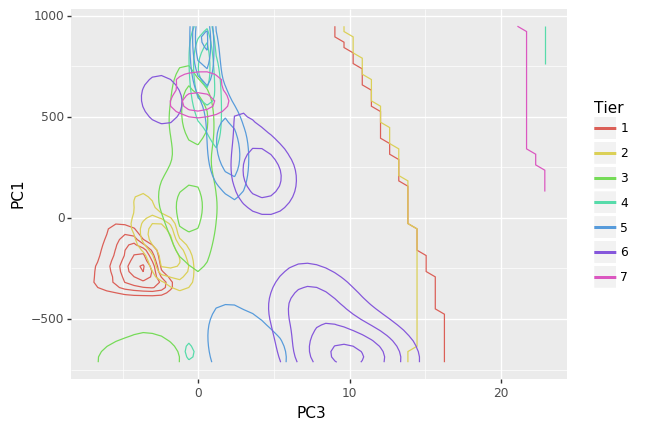

<ggplot: (-9223371915192434924)>

In [41]:
from plotnine import ggplot, aes, geom_density_2d

(ggplot(finalDf, aes(x = "PC3", y = "PC1", group = "Tier", color = "Tier", label = "index")) +
    geom_density_2d() )

After some investigation, we managed to get one representation of the score "surface" when labeled by tier. Across the landscape, the scores within most tiers coalesce around one another, forming localized regions. Though this is true for some groups, Tiers 4 through 7 all have multiple regions where validator scores rest. This is an indication that there is further behavior to be distinguished between the nodes within the same segment.

Here, we show the representative sample of the most common validator profiles within each tier.

In [42]:
sample = valid_all.loc[valid_all['Rank'].isin([55821, 76695, 77761, 33530, 66925, 67885, 
                                       14959, 4979, 304, 19820, 55757, 66918, 72185])]

sample['index'] = sample['index'].astype('category')
cm = sns.light_palette("green", as_cmap=True)

sample.style.background_gradient(cmap=cm)

### What does these representative sample tell us?

Starting with Tier 1, we have our Perfect Proposers, validators who exhibit the best combination of behaviors we track. These validators have the highest number of successful blocks to go along with their longer than average active time on the network. 

Next we have the Tier 2 validators. Though they have similar characteristics as the Tier 1, particularly perfect proposal rates, they have been active for a slightly shorter time and have proposed fewer blocks. 

In Tier 3, we see the trend continue where they've been on the network a shorter and shorter period of time. 

Tier 4 is where poor performance begins to manifest itself in actual skipped blocks. We can see new validators and those who have skipped one or more block proposals in this Tier. 

Then, In Tier 5 and Tier 6, we start to see more and more skipped blocks and lower current balance. In particular, validators in Tier 6 have skipped more block assignments than they have successfully proposed, yet have managed to be stay on the network for the longest period of time. 

Lastly, we see new validators who have been slashed, regardless whether they have skipped a block in Tier 7. 


## Conclusion


Our key takeaway from this analysis is that, when performing our ranking procedure across the nearly dozen of variables and over 80,000 validators, true "tiers" of validators do in fact exist. At the top of the list, Tier 1 validators execute 100% of their assignments, maintain a high effective balance, have not been slashed and have been active from very early on. On the bottom end are validators who were slashed, and failed to execute their assignments. Distributionally, as expected, most validators fall somewhere in between these two extremes. It will be quite interesting to see how the scores that make up the backbone of the tier-based ranking system evolve as time goes on.

Among other interesting findings, we found:

* Nearly every epoch, 4 validators are activated, except for two periods between Epoch 3238 and 3440, and the other, between 14189 and 14311
* A large spike in exiting validators was observed between the 3000th and 4000th epoch.
* The aforementioned spike corresponds to a large increase in the number of slashed validators.
* The average validator has been assigned 6 slots.
* The distribution of the execution and skipped rate follows flipped beta distributions.

With only a couple months of data, we expect that these findings will continue to evolve, and as such, the tiers defining relative performance of validators will continue to need adjustment over time.

<img src="images/Cut_outs/Cut_out_16.png" width=100 height=100 />

## References
* Ethereum [https://ethereum.org/]
* Medalla Data Challenge [https://ethereum.org/en/eth2/get-involved/medalla-data-challenge/]
* Medalla Data Challenge Wishlist [https://www.notion.so/Wishlist-The-Eth2-Medalla-Data-Challenge-69fe10ffe83748bc87faa0e2586ba857]
* Ethereum 2.0 Beacon Chain Explorer [beaconscan.com/]
* Consensys Glossary of Ethereum 2.0 Terms [https://consensys.net/knowledge-base/ethereum-2/glossary/]
* Breaking Down ETH 2.0 - Sharding Explained [https://academy.ivanontech.com/blog/breaking-down-eth-2-0-sharding-explained]
* Rewards and Penalties on Ethereum 2.0 [Phase 0] [https://codefi.consensys.net/blog/rewards-and-penalties-on-ethereum-20-phase-0]
* Ethereum 2.0 Explained | Part II | Phase 0 and the Beacon Chain [https://youtu.be/-qwSAFcicg8]
